# STAT3612 Lecture 2 - Data Exploration

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3622 Data Visualization](http://www.statsoft.org/teaching/stat3622/)

21 January 2019

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [2]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X.shape

(150, 4)

In [4]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
y = pd.DataFrame(iris.target, columns=['class'])
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
y['n'] = 1
y.groupby('class').sum().values[:,0]

array([50, 50, 50])

# Basic plots with Matplotlib

In [7]:
import matplotlib.pyplot as plt
x1 = X['sepal length (cm)']
plt.figure(1, figsize=(8, 6))
plt.hist(x1, bins=20)
plt.title('Sepal Length: Histogram',fontsize=15, fontweight="bold")
plt.show()

<Figure size 800x600 with 1 Axes>

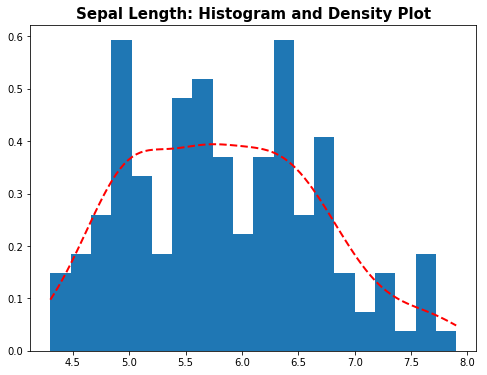

In [8]:
from scipy.stats import gaussian_kde
import numpy as np

density = gaussian_kde(x1)

plt.figure(1, figsize=(8, 6))
plt.hist(x1, bins=20, density = True)
tmp = np.linspace(x1.min(), x1.max(), 100)
plt.plot(tmp, density(tmp), color='red', linewidth=2, linestyle='dashed')
plt.title('Sepal Length: Histogram and Density Plot', fontsize=15, fontweight="bold")
plt.show()

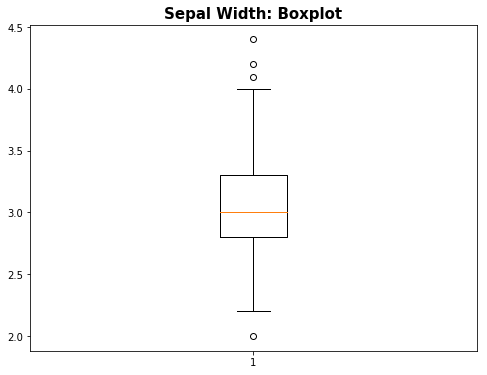

In [9]:
plt.figure(1, figsize=(8, 6))
plt.boxplot(X['sepal width (cm)'])
plt.title('Sepal Width: Boxplot',fontsize=15, fontweight="bold")
plt.show()

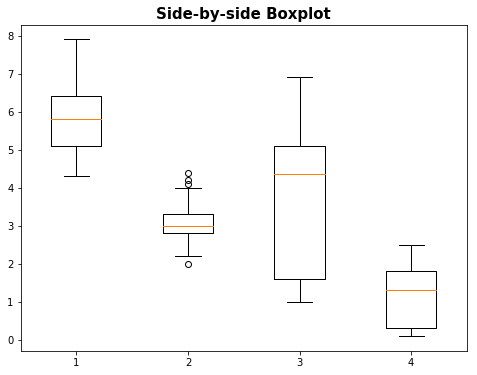

In [10]:
plt.figure(1, figsize=(8, 6))
plt.boxplot(X.T)
plt.title('Side-by-side Boxplot',fontsize=15, fontweight="bold")
plt.show()

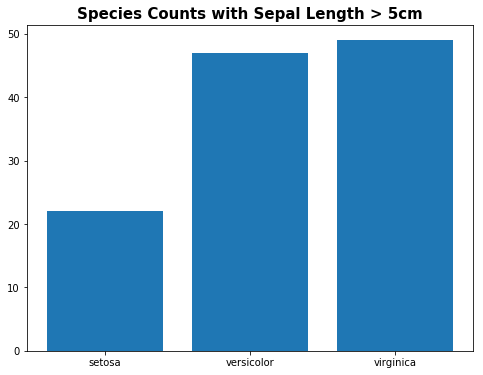

In [11]:
# Bar Chart for Categorical Variable

plt.figure(1, figsize=(8, 6))
plt.bar(iris.target_names, y[X['sepal length (cm)']>5].groupby('class').sum()['n'].values)
plt.title('Species Counts with Sepal Length > 5cm',fontsize=15, fontweight="bold")
plt.show()

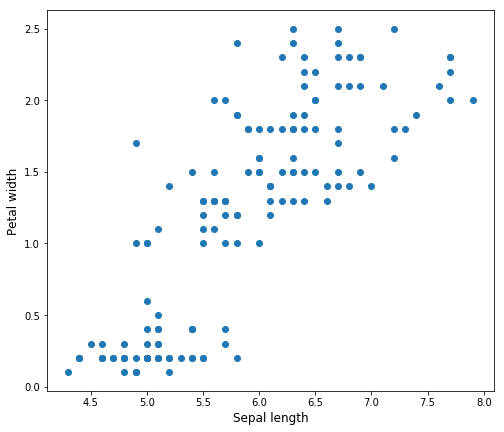

In [12]:
plt.figure(1, figsize=(8, 7))
x1, x2 = X['sepal length (cm)'], X['petal width (cm)']
plt.scatter(x1, x2)
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.show()

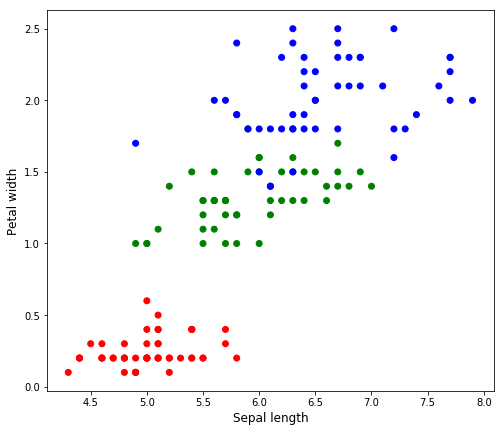

In [13]:
import matplotlib.colors as col

plt.figure(1, figsize=(8, 7))
plt.scatter(x1, x2, c=y.values[:,0], cmap=col.ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.show()

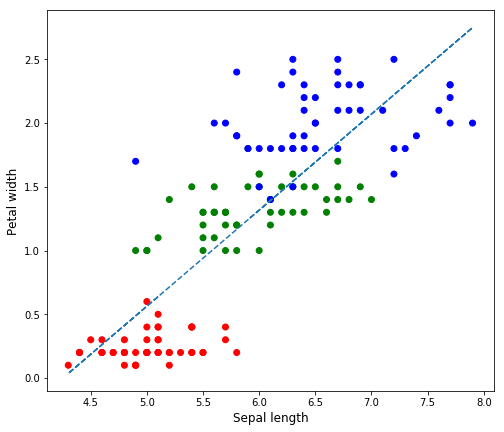

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x1.values.reshape([-1, 1]), x2.values.reshape([-1, 1]))
fit = model.predict(x1.values.reshape([-1, 1]))

plt.figure(1, figsize=(8, 7))
plt.scatter(x1, x2, c=y.values[:,0], cmap=col.ListedColormap(['red', 'green', 'blue']))
plt.plot(x1, fit, linestyle='dashed')
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.show()

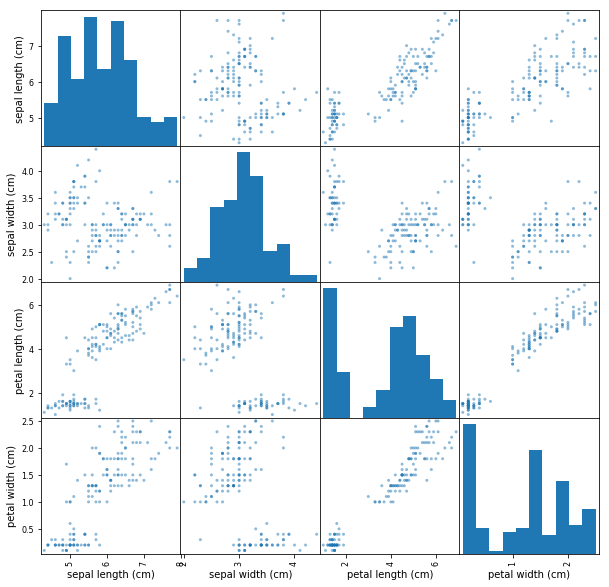

In [15]:
import pandas.plotting as pdplt

pd.scatter_matrix(X, figsize=(10,10))
plt.show()

# Data Manipulation with Pandas

In [16]:
Data = pd.merge(X, y, left_index = True, right_index=True)
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,n
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [17]:
Data.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),n
class,,,,,
0,5.006,3.418,1.464,0.244,1
1,5.936,2.770,4.260,1.326,1
2,6.588,2.974,5.552,2.026,1


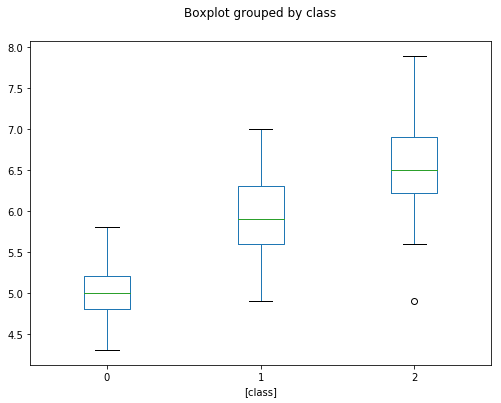

In [18]:
Data[['sepal length (cm)', 'class']].boxplot(by="class",figsize=(8,6))
plt.title('');
plt.grid('off')

In [19]:
Data['flag'] = Data['sepal length (cm)']>5
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,n,flag
0,5.1,3.5,1.4,0.2,0,1,True
1,4.9,3.0,1.4,0.2,0,1,False
2,4.7,3.2,1.3,0.2,0,1,False
3,4.6,3.1,1.5,0.2,0,1,False
4,5.0,3.6,1.4,0.2,0,1,False


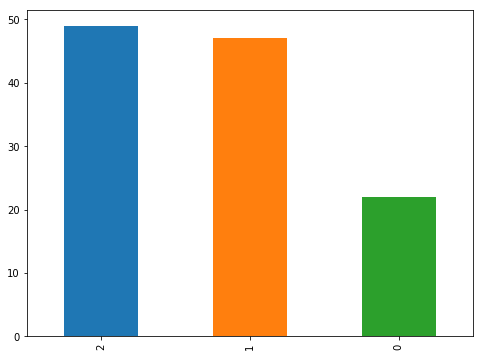

In [20]:
plt.figure(1, figsize=(8, 7))
pd.value_counts(Data[Data['flag']]['class']).plot.bar(figsize=(8,6))
plt.show()

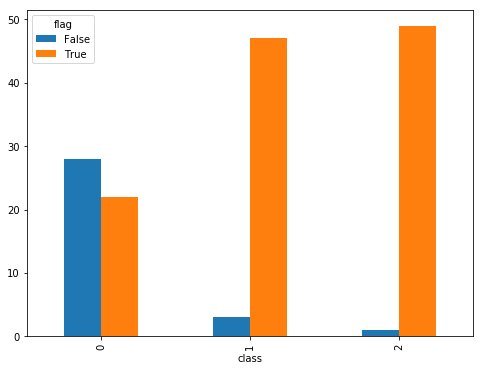

In [21]:
pd.crosstab(Data['class'], Data['flag']).plot.bar(figsize=(8,6))
plt.show()

# Data Visualization with ggplot/bokeh/plotly 

To be continued ... 